<a href="https://colab.research.google.com/github/nuraishasb/UnsupervisedML/blob/main/R_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

pca
k-means clustering
hierarchical clustering

In [7]:
df <- read.csv(url("https://raw.githubusercontent.com/lse-me314/lse-me314.github.io/master/data/const-econ-vars.csv"))
head(df)

,ONSConstID,ConstituencyName,HouseWageRatio,UnempConstRate,UnempConstRateChange,WageMedianConst,social_mobility_score,deprivation_index_score
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,E14000530,Aldershot,9.778357,0.01601645,-0.014241906,590,-24.94625,14.264920
2,E14000531,Aldridge-Brownhills,6.866415,0.03081285,-0.021427075,560,12.11135,17.265634
3,E14000532,Altrincham and Sale West,8.154820,0.02031075,-0.006724744,790,103.84612,9.642267
4,E14000533,Amber Valley,5.593565,0.03287494,-0.017034626,520,-37.11118,20.806737
5,E14000534,Arundel and South Downs,12.608764,0.01363878,-0.005952356,610,-54.87172,10.522037
6,E14000535,Ashfield,5.184766,0.03827855,-0.015818210,510,-30.71503,25.756452


In [8]:
#assessing correlations
round(cor(df[,3:8], use = "pairwise.complete.obs"),2)

,HouseWageRatio,UnempConstRate,UnempConstRateChange,WageMedianConst,social_mobility_score,deprivation_index_score
HouseWageRatio,1.00,-0.40,-0.04,0.68,0.56,-0.33
UnempConstRate,-0.40,1.00,-0.17,-0.52,-0.26,0.90
UnempConstRateChange,-0.04,-0.17,1.00,0.04,0.03,-0.39
WageMedianConst,0.68,-0.52,0.04,1.00,0.66,-0.55
social_mobility_score,0.56,-0.26,0.03,0.66,1.00,-0.30
deprivation_index_score,-0.33,0.90,-0.39,-0.55,-0.30,1.00


The unemployment rate and the deprivation index is highly correlated.

explain other observations

### Principal Component Analysis

what is it how it works

In [9]:
#calculating principal components
pca <- prcomp(df[,3:8], scale. = TRUE)
pca
summary(pca)

Standard deviations (1, .., p=6):
[1] 1.7666732 1.1652675 0.8889118 0.6460604 0.5037648 0.2442953

Rotation (n x k) = (6 x 6):
                               PC1        PC2        PC3         PC4
HouseWageRatio          -0.4159756 -0.3771834 0.05947919  0.75825898
UnempConstRate           0.4548338 -0.3205344 0.47247017  0.03825962
UnempConstRateChange    -0.1302040  0.6051598 0.73740722  0.20929981
WageMedianConst         -0.4881757 -0.2380995 0.06771818 -0.04389976
social_mobility_score   -0.3867713 -0.3868244 0.42061614 -0.59345975
deprivation_index_score  0.4639288 -0.4271388 0.21900014  0.16016068
                                PC5         PC6
HouseWageRatio          -0.30144653  0.12382456
UnempConstRate           0.22721115  0.64348050
UnempConstRateChange     0.02493771 -0.16920649
WageMedianConst          0.82807063 -0.11304521
social_mobility_score   -0.41158724 -0.04752232
deprivation_index_score  0.04216830 -0.72590075

Importance of components:
                          PC1    PC2    PC3     PC4    PC5     PC6
Standard deviation     1.7667 1.1653 0.8889 0.64606 0.5038 0.24430
Proportion of Variance 0.5202 0.2263 0.1317 0.06957 0.0423 0.00995
Cumulative Proportion  0.5202 0.7465 0.8782 0.94776 0.9900 1.00000

A principal component that predicts as much variation in the other variables as possible cannot possibly predict much variation in a variable that is poorly correlated with all other variables.

In [10]:
pca_var <- pca$sdev^2
pca_var/sum(pca_var)

[1] 0.520189034 0.226308070 0.131694023 0.069565679 0.042296497 0.009946697

The first principal component explains approximately 52% of the variance in the underlying data.

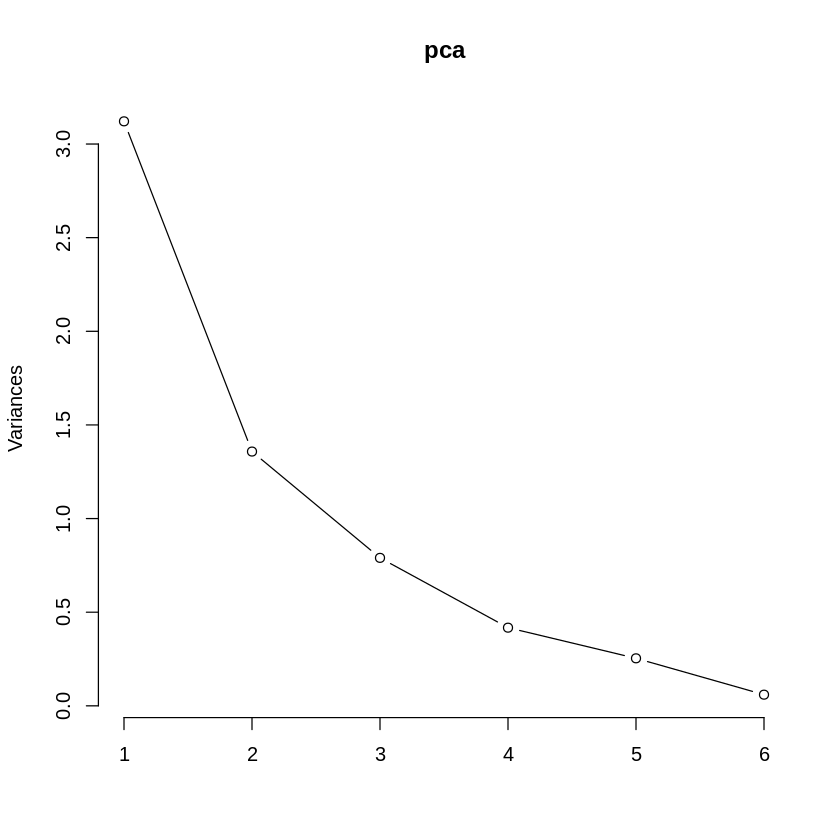

In [12]:
screeplot(pca,type = "lines")

what does this graph mean?

In [13]:
#print loadings for first principal component
pca$rotation[,1]

HouseWageRatio          UnempConstRate    UnempConstRateChange 
             -0.4159756               0.4548338              -0.1302040 
        WageMedianConst   social_mobility_score deprivation_index_score 
             -0.4881757              -0.3867713               0.4639288

From this, we learn that the general tendency is for attributes of less economically successful places to be positively correlated with the first principal component: lower house prices, higher unemployment, lower wages, lower social mobility and higher deprivation.  You could argue about whether this is capturing a concept that should be understood as "economic success" or "affluence" or something else similar.  The one slight mismatch is the unemployment change variable, which is weakly negatively associated with the first principal component.  As we noted before, this variable perhaps does not belong in this analysis because it describes changes over time rather than levels.

In [14]:
#loadings for pc2
pca$rotation[,2]

HouseWageRatio          UnempConstRate    UnempConstRateChange 
             -0.3771834              -0.3205344               0.6051598 
        WageMedianConst   social_mobility_score deprivation_index_score 
             -0.2380995              -0.3868244              -0.4271388

PC2 is positively associated with unemployment rate changes and negatively associated with everything else.  It would appear this is heavily a factor for capturing unemployment rate changes, which we have already seen are mostly uncorrelated with the over variables.  It does capture a bit of additional variation from the other variables, but not in a way that I was able to make much sense of!

In [15]:
pca2 <- prcomp(df[,c(3,4,6,7,8)], scale. = TRUE)
pca2
summary(pca2)

Standard deviations (1, .., p=5):
[1] 1.7565429 1.0658834 0.6638214 0.5041835 0.2891193

Rotation (n x k) = (5 x 5):
                               PC1        PC2         PC3         PC4
HouseWageRatio          -0.4294957 -0.3798653 -0.73628018 -0.31772277
UnempConstRate           0.4531833 -0.5254131  0.07272015  0.20909319
WageMedianConst         -0.4979047 -0.2271984  0.02627548  0.83039862
social_mobility_score   -0.3964105 -0.5029322  0.64941606 -0.40424205
deprivation_index_score  0.4528885 -0.5244840 -0.17369989  0.04856716
                                PC5
HouseWageRatio          -0.16786763
UnempConstRate          -0.68524285
WageMedianConst          0.10109171
social_mobility_score    0.06902949
deprivation_index_score  0.69805307

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.7565 1.0659 0.66382 0.50418 0.28912
Proportion of Variance 0.6171 0.2272 0.08813 0.05084 0.01672
Cumulative Proportion  0.6171 0.8443 0.93244 0.98328 1.00000

[1] 0.9969929

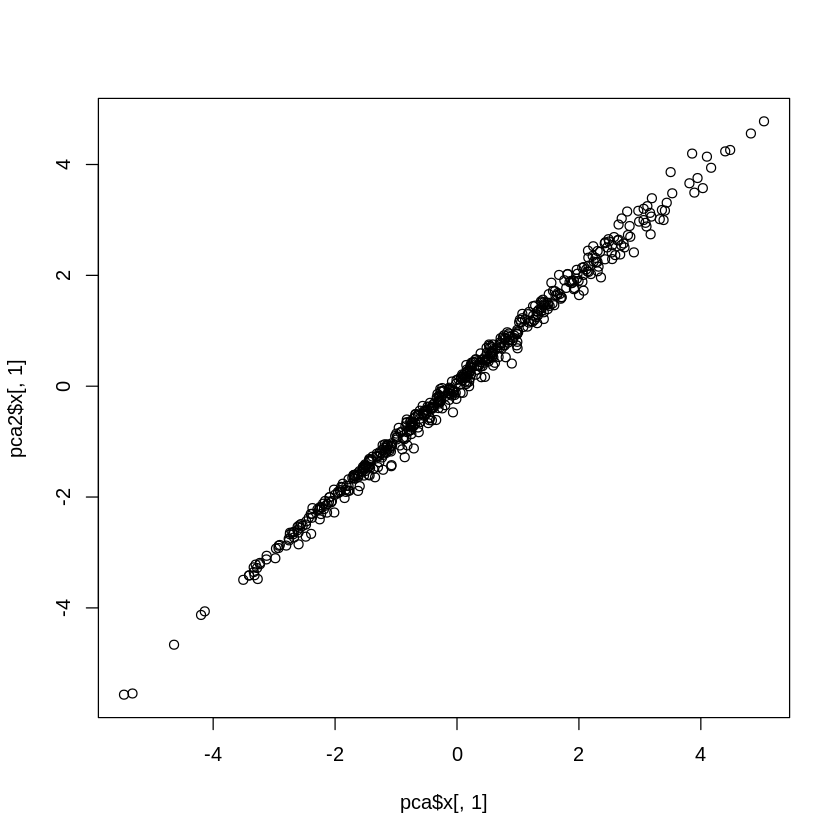

In [16]:
plot(pca$x[,1],pca2$x[,1])
cor(pca$x[,1],pca2$x[,1])

The relative loadings on the five remaining variables are nearly identical to their previous values.  The first principal component values for the constituencies are very nearly identical as well, correlated at over 0.99.  Very little has changed because the variable we omitted was very weakly correlated with the others.  Put differently, changes in unemployment are not really closely related to affluence or economic success of constituencies, so they are a poor indicator of that more general concept.  The other five indicators tend to go together much more strongly.

### K-means Clustering

what is it
how is it used

In [18]:
data("USArrests", package = "datasets")

In [22]:
km_out <- kmeans(USArrests, 3, nstart = 20)
km_out

K-means clustering with 3 clusters of sizes 20, 14, 16

Cluster means:
     Murder  Assault UrbanPop     Rape
1  4.270000  87.5500 59.75000 14.39000
2  8.214286 173.2857 70.64286 22.84286
3 11.812500 272.5625 68.31250 28.37500

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             3              3              3              2              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              3              3              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              3              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              3              1              3 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              3              1              3          

what does the output mean?

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sf’, ‘usmapdata’




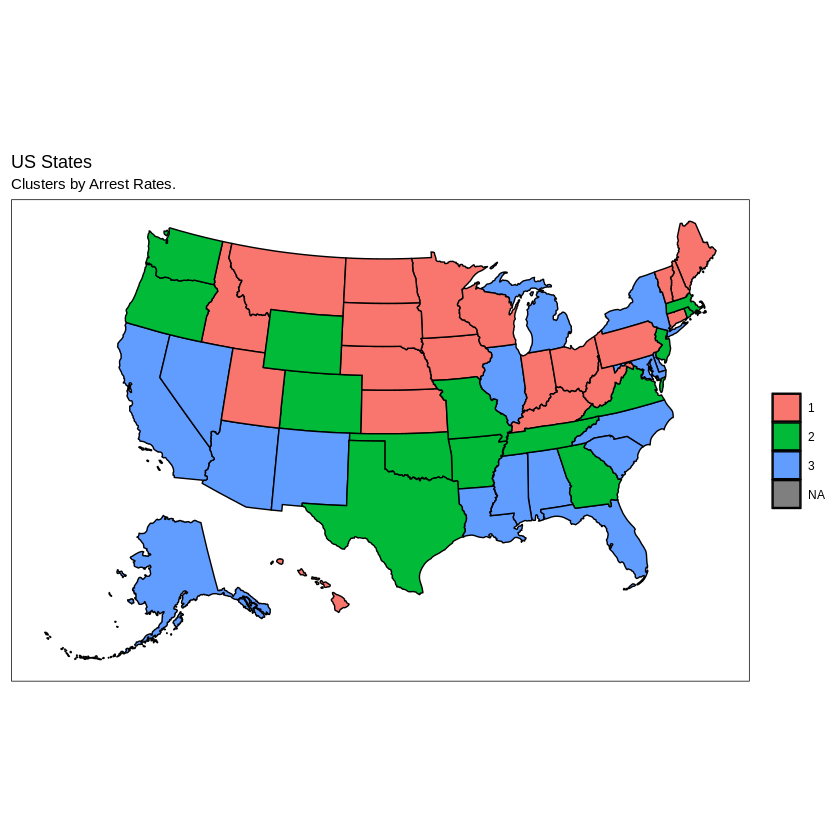

In [24]:
library(ggplot2)
install.packages("usmap")
library(usmap)

cluster <- km_out$cluster

classification_df <- data.frame(state=tolower(names(cluster)),
                                cluster=as.factor(as.numeric(cluster)))

state_plot <- plot_usmap(regions="states", data=classification_df, values="cluster") +
  labs(title="US States",subtitle="Clusters by Arrest Rates.") +
  scale_colour_hue() +
  theme( panel.background = element_rect(color = "black", fill = "white"), legend.position="right") +
  guides(fill=guide_legend(title=""))

state_plot

graph interpretation

### Hierarchical Clustering

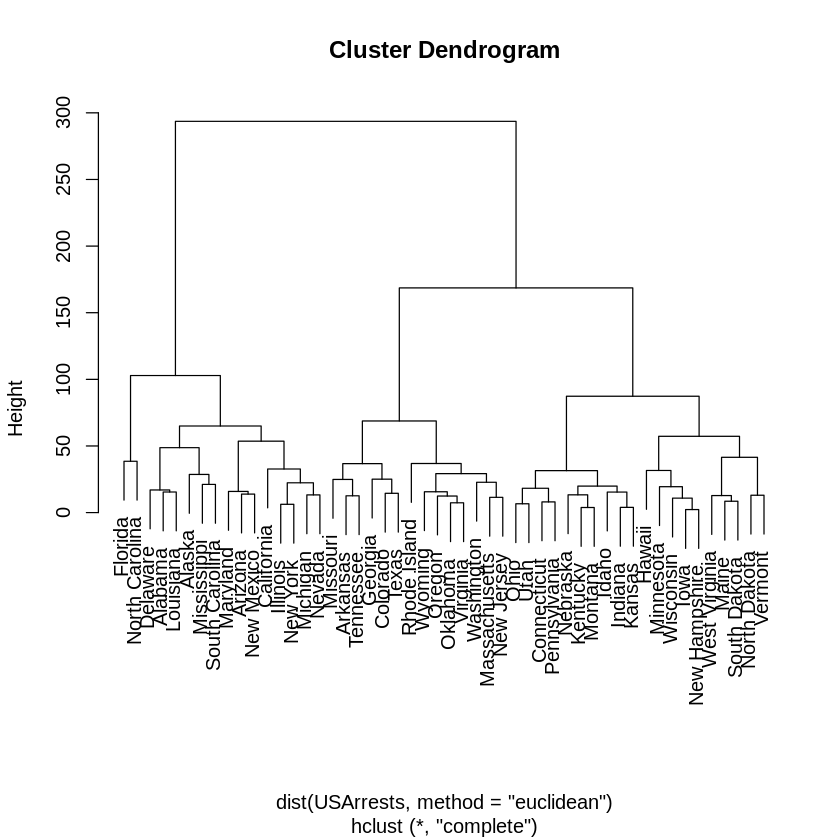

In [25]:
#perform hierarchical clustering
hc <- hclust(dist(USArrests, method = "euclidean"), method = "complete")
plot(hc)

In [26]:
#cutting at 3 clusters
cutree(hc, 3)
table(cutree(hc, 3))

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2


 1  2  3 
16 14 20 

how does the kmeans cluster differ from hc?
are the same countries clustered together using the same approach?

In [27]:
USArrests$clusters_k <- km_out$cluster
USArrests$clusters_h <- cutree(hc, 3)

table(USArrests$clusters_k, USArrests$clusters_h)

   
     1  2  3
  1  0  0 20
  2  0 14  0
  3 16  0  0

Hierarchically cluster the states again using complete linkage and Euclidean distance. However, before you run the `hclust()` function, first scale each of the variables to have standard deviation one. You can acheive this by applying the `scale()` function to `USArrests`. What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

   
     1  2  3
  1 15  1  0
  2  0 14  0
  3  0  0 20


 1  2  3 
16 14 20 

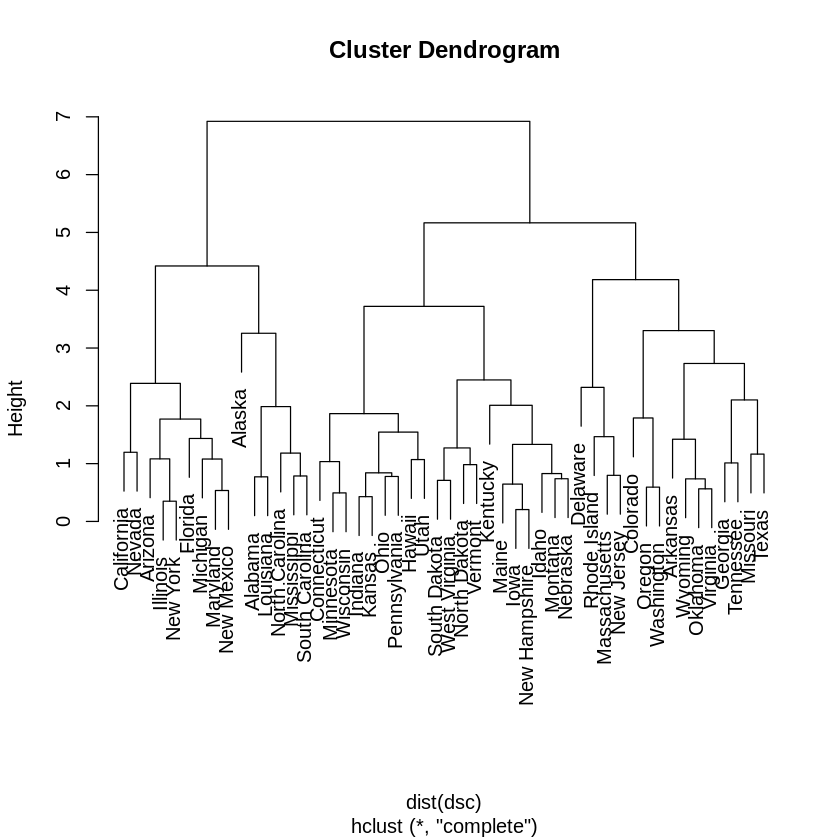

In [28]:
dsc <-  scale(USArrests)
hc.s.complete <-  hclust(dist(dsc), method = "complete")
plot(hc.s.complete)
USArrests$clusters_h_s <- cutree(hc.s.complete, 3)
table(USArrests$clusters_h, USArrests$clusters_h_s)
table(USArrests$clusters_h)